# XPECTO Epidemic 2.0: Competition Playground

This notebook provides the official competition environment for XPECTO Epidemic 2.0. All attempts in this notebook are recorded for the official competition. You are limited to 3 official attempts per scenario.

> ⚠️ Important: Before using this notebook, we recommend practicing in the practice_playground.ipynb notebook to refine your strategies. Only use this notebook when you're ready to submit an official attempt.

## Setup

First, let's set up our environment and import the necessary modules.

In [1]:
# Add the project root to the path
import sys
import os
from pathlib import Path

# Add parent directory to path for imports
sys.path.append(str(Path.cwd().parent))

# Import required modules
from src.competition import CompetitionManager
from src.mirage.engines.base import EngineV1 as Engine

# Import visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization
plt.style.use('seaborn-whitegrid')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)

Testing mode enabled: EngineV1 replaced with MockEngine


## Initialize Competition System

Now, let's initialize the competition system and register as a player.

In [2]:
# Create an epidemic engine with the standard configuration
engine = Engine()

# Create competition manager with the competition data directory
competition = CompetitionManager(data_dir="competition_data", engine=engine)

# Register as a player - use your real name for the official competition
player_name = "Your Name" # Change this to your name
player_id = competition.setup_player(name=player_name)
print(f"Registered as player: {player_name} (ID: {player_id})")

# Ensure we're in competition mode
competition.toggle_practice_mode(is_practice=False)
print("Competition mode enabled - attempts will count toward your official score")

Player registered: Your Name (ID: 40628f7e-dbcc-41c7-8ea1-3954fa04587d)
Registered as player: Your Name (ID: 40628f7e-dbcc-41c7-8ea1-3954fa04587d)
Mode set to: Competition
Competition mode enabled - attempts will count toward your official score


## Available Scenarios

Let's check what scenarios are available in the competition.

In [3]:
# List available scenarios
competition.list_available_scenarios()

,ID,Name,Difficulty,R0,Resources
0,standard,Standard Outbreak,standard,2.5,1000
1,challenging,Challenging Outbreak,challenging,3.5,700


[{'id': 'standard',
  'name': 'Standard Outbreak',
  'description': 'A standard epidemic outbreak scenario with normal parameters.',
  'seed': 'standard_2023',
  'r0': 2.5,
  'initial_infections': {'capital': 100},
  'initial_resources': 1000,
  'difficulty': 'standard',
  'parameters': {'disease_mortality': 0.02,
   'treatment_effectiveness': 0.7,
   'vaccine_development_time': 120,
   'economic_impact_factor': 1.0}},
 {'id': 'challenging',
  'name': 'Challenging Outbreak',
  'description': 'A more difficult scenario with multiple infection sites and higher R0.',
  'seed': 'challenging_2023',
  'r0': 3.5,
  'initial_infections': {'capital': 50,
   'major_city_1': 30,
   'major_city_2': 20},
  'initial_resources': 700,
  'difficulty': 'challenging',
  'parameters': {'disease_mortality': 0.03,
   'treatment_effectiveness': 0.6,
   'vaccine_development_time': 150,
   'economic_impact_factor': 1.2}}]

## Select a Scenario

Choose a scenario to work with. You can modify this cell to select different scenarios.

In [4]:
# Select the scenario to use
scenario_id = "standard" # Options: "standard", "challenging", etc.
competition.set_scenario(scenario_id)
competition.display_scenario_details()

# Check how many attempts you have remaining for this scenario
remaining_attempts = competition.get_remaining_attempts()
print(f"\nYou have {remaining_attempts} official attempts remaining for the '{scenario_id}' scenario.")

Current scenario set to: Standard Outbreak (standard)



You have 3 official attempts remaining for the 'standard' scenario.


## Define Your Strategy

Define your intervention strategy. This should be your final, refined strategy that you want to submit for the competition.

In [5]:
# Define your competition strategy here
def competition_strategy(engine):
    """
    My official competition strategy for epidemic intervention.
    """
    # Initial setup
    engine.set_lockdown_level(0.6) # Start with significant restrictions
    engine.allocate_resources('healthcare', 250) # Initial healthcare investment
    engine.allocate_resources('research', 100) # Some research investment
    
    # Define a callback for dynamic response
    def adaptive_response(step, state):
        # Extract key metrics from the current state
        infection_rate = state.population.infected / state.population.total
        economic_health = state.economy.current_gdp / state.economy.initial_gdp
        healthcare_capacity = state.healthcare.capacity / state.population.total
        
        # Early phase strategy (first 60 days)
        if step < 60:
            if infection_rate > 0.08: # Rising infections
                engine.set_lockdown_level(0.8) # Strong lockdown
                engine.allocate_resources('healthcare', 350) # Boost healthcare
                engine.restrict_travel(True) # Restrict travel
            else: # Controlled situation
                engine.set_lockdown_level(0.6) # Maintain restrictions
                engine.allocate_resources('healthcare', 250) # Standard healthcare
                engine.restrict_travel(True) # Keep travel restricted
        
        # Mid phase strategy (days 60-180)
        elif 60 <= step < 180:
            # High infection crisis
            if infection_rate > 0.15: 
                engine.set_lockdown_level(0.9) # Maximum lockdown
                engine.allocate_resources('healthcare', 400) # Maximum healthcare
                engine.allocate_resources('research', 150) # Increased research
                engine.restrict_travel(True) # Maintain travel restrictions
            
            # Moderate infection concerns
            elif infection_rate > 0.05:
                # Balance approach based on economic health
                if economic_health < 0.6: # Poor economy
                    engine.set_lockdown_level(0.6) # Lower restrictions to help economy
                    engine.allocate_resources('economic', 200) # Economic stimulus
                    engine.allocate_resources('healthcare', 250) # Maintain healthcare
                else: # Healthy economy, focus on containment
                    engine.set_lockdown_level(0.7) # Higher restrictions
                    engine.allocate_resources('healthcare', 300) # Increased healthcare
                    engine.allocate_resources('research', 100) # Maintain research
            
                # Adjust travel restrictions based on infection trends
                engine.restrict_travel(infection_rate > 0.08)
            
            # Low infection, recovery phase
            else:
                engine.set_lockdown_level(0.4) # Reduced restrictions
                engine.allocate_resources('economic', 250) # Focus on economy
                engine.allocate_resources('healthcare', 150) # Reduced healthcare
                engine.restrict_travel(False) # Open travel
        
        # Late phase strategy (day 180+)
        else:
            # Infection resurgence
            if infection_rate > 0.1: 
                engine.set_lockdown_level(0.8) # Strong restrictions
                engine.allocate_resources('healthcare', 350) # Strong healthcare
                engine.restrict_travel(True) # Restrict travel
            
            # Controlled but present infection
            elif infection_rate > 0.02:
                # Balanced approach with economic focus
                engine.set_lockdown_level(0.5) # Moderate restrictions
                engine.allocate_resources('economic', 200) # Economic focus
                engine.allocate_resources('healthcare', 200) # Maintained healthcare
                engine.restrict_travel(False) # Allow travel for economy
            
            # Nearly contained epidemic
            else:
                # Recovery phase
                engine.set_lockdown_level(0.2) # Minimal restrictions
                engine.allocate_resources('economic', 300) # Strong economic recovery
                engine.allocate_resources('healthcare', 100) # Basic healthcare maintenance
                engine.restrict_travel(False) # Open travel
        
        # Healthcare capacity management throughout all phases
        if healthcare_capacity < 0.01: # Critical healthcare shortage
            engine.allocate_resources('healthcare', max(400, engine.get_allocated_resources('healthcare') + 100))
    
    # Register the callback
    engine.register_step_callback(adaptive_response)

## Run Official Competition Attempt

⚠️ Warning: This will count as one of your limited official attempts. Only proceed when you're ready.

In [6]:
# Final confirmation before running
confirmation = input(f"This will count as an official attempt for the '{scenario_id}' scenario. Type 'YES' to confirm: ")

if confirmation.upper() == 'YES':
    # Set up the simulation
    competition.setup_simulation()
    
    print("\nRunning official competition attempt...")
    # Run the simulation with your strategy
    results = competition.run_simulation(
        steps=365, # Simulate for 1 year
        interventions=[competition_strategy] # Use your competition strategy
    )
    
    # Save the results
    attempt_id = competition.save_attempt(results)
    
    print(f"\nOfficial attempt completed and saved with ID: {attempt_id}")
    print(f"You have {competition.get_remaining_attempts()} attempts remaining for this scenario.")
    
    # Display the results
    print("\nYour competition results:")
    competition.display_score(results)
else:
    print("Attempt cancelled. No official attempt was recorded.")

Scenario 'Standard Outbreak' configured with slight variations:
  - R0: 2.40 (base: 2.5)
  - Initial infections: 108 across regions (base: 100)
  - Resources: 986 (base: 1000)
Simulation configured for scenario: Standard Outbreak

Running official competition attempt...

Official attempt completed and saved with ID: True
You have 1 attempts remaining for this scenario.

Your competition results:


## View Your Results

In [7]:
# Display your competition attempts
competition.display_player_attempts()

,Timestamp,Scenario,Official,Score,Pop. Survived,GDP,Infection Control,Resources,Containment
0,2025-03-30 15:12,standard,Yes,0.5855,1.00,0.00,0.99,0.58,0.00
1,2025-03-30 15:12,standard,Yes,0.5855,1.00,0.00,0.99,0.58,0.00


## View The Leaderboard

Let's check where your attempt ranks on the leaderboard.

In [8]:
# Display the current leaderboard
competition.display_leaderboard()

No entries in the leaderboard yet


## Save and Export Results

You can export your results for submission or further analysis.

In [9]:
# Export your best result for the current scenario
export_path = f"results_{player_name.replace(' ', '')}{scenario_id}.json"
competition.export_best_result(export_path)
print(f"Your best result exported to: {export_path}")

# You can also export the current leaderboard
competition.save_leaderboard("leaderboard.json")
print("Current leaderboard saved to: leaderboard.json")

Best result exported to: results_YourNamestandard.json
Your best result exported to: results_YourNamestandard.json
No entries in the leaderboard to save
Current leaderboard saved to: leaderboard.json


## Analytics: Performance Breakdown

Let's analyze your performance in more detail.

   step
0     0
1     1
2     2
3     3
4     4
Columns in metrics_df: Index(['step'], dtype='object')


KeyError: 'infection_rate'

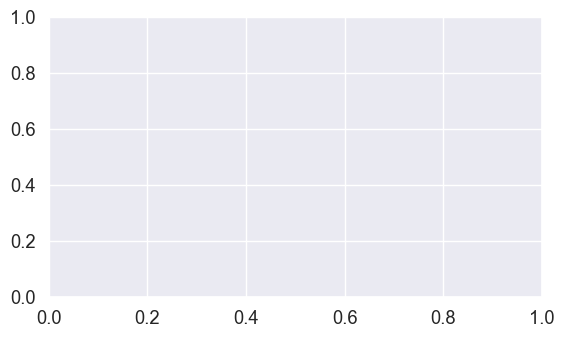

In [10]:
# Get detailed metrics from your latest attempt
metrics = competition.get_detailed_metrics()

# Create a dataframe for visualization
if metrics:
    metrics_df = pd.DataFrame(metrics)
    
    # Plot time series data
    print(metrics_df.head())  # See if `infection_rate` exists and has valid values
    print("Columns in metrics_df:", metrics_df.columns)  # Check if `infection_rate` exists

    plt.figure(figsize=(14, 8))
    
    # Plot infection rate over time
    plt.subplot(2, 2, 1)
    plt.plot(metrics_df['step'], metrics_df['infection_rate'], 'r-', linewidth=2)
    plt.title('Infection Rate Over Time', fontsize=14)
    plt.xlabel('Days', fontsize=12)
    plt.ylabel('Infection Rate', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Plot GDP over time
    plt.subplot(2, 2, 2)
    plt.plot(metrics_df['step'], metrics_df['gdp'], 'g-', linewidth=2)
    plt.title('GDP Over Time', fontsize=14)
    plt.xlabel('Days', fontsize=12)
    plt.ylabel('GDP', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Plot resource allocation over time
    plt.subplot(2, 2, 3)
    plt.plot(metrics_df['step'], metrics_df['healthcare_resources'], 'b-', label='Healthcare')
    plt.plot(metrics_df['step'], metrics_df['economic_resources'], 'y-', label='Economic')
    plt.plot(metrics_df['step'], metrics_df['research_resources'], 'c-', label='Research')
    plt.title('Resource Allocation Over Time', fontsize=14)
    plt.xlabel('Days', fontsize=12)
    plt.ylabel('Resources', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot lockdown level over time
    plt.subplot(2, 2, 4)
    plt.plot(metrics_df['step'], metrics_df['lockdown_level'], 'k-', linewidth=2)
    plt.title('Lockdown Level Over Time', fontsize=14)
    plt.xlabel('Days', fontsize=12)
    plt.ylabel('Lockdown Level', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No detailed metrics available for analysis.")